## 5. Histogram Equalization

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

### Equalization Using Custom Equalizing Function

In [30]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None


def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape
  
    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum() # calculate cumulative distribution function
    
    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)

    return t[f]


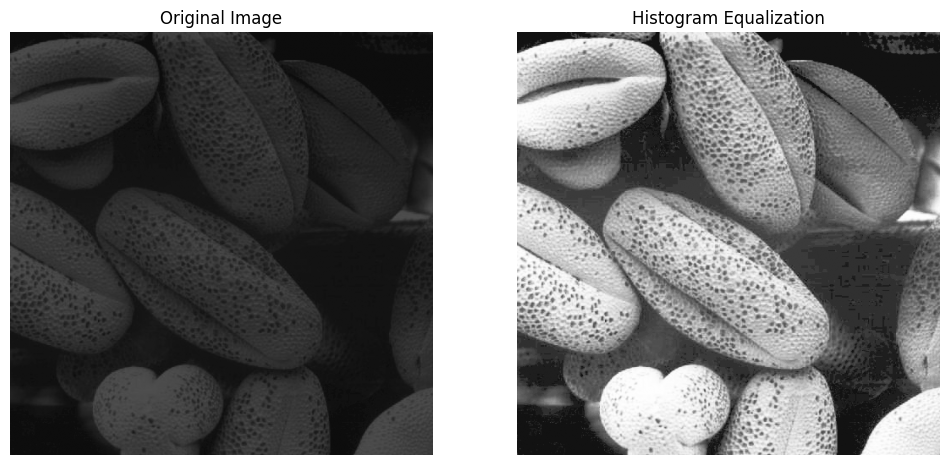

In [31]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

# Show the plot
plt.show()

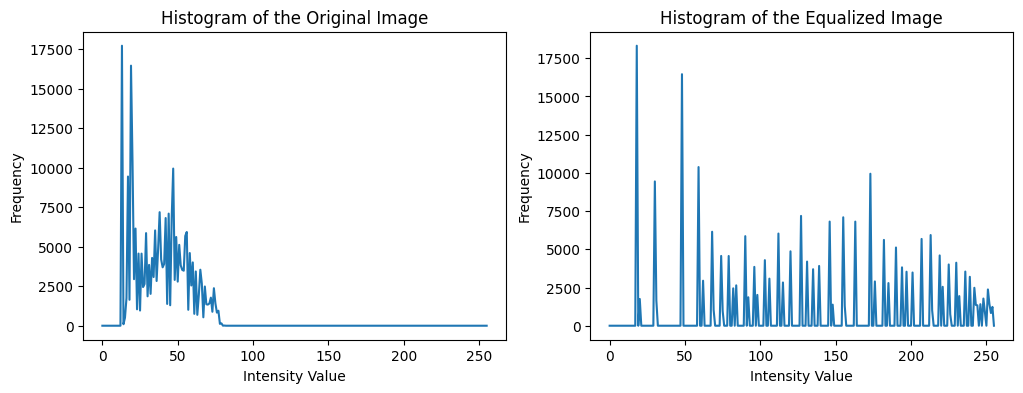

In [32]:
# Compute the histograms for both images
hist3 = cv.calcHist([shells], [0], None, [256], [0, 256])     # Calculate the histogram of the original image
equalized = histogram_equalization(shells)
hist4 = cv.calcHist([equalized], [0], None, [256], [0, 256])      # Calculate the histogram of the equalized image

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist3)
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist4)
ax[1].set_title('Histogram of the Equalized Image')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

### Equalization Using In-built Equalizing Function

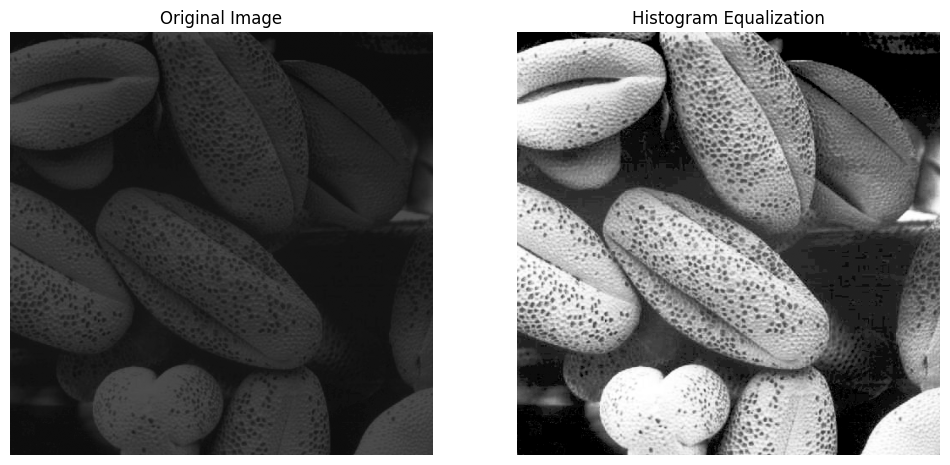

In [33]:
equal = cv.equalizeHist(shells)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(equal, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

# Show the plot
plt.show()

# Approch

A custom histogram equalization was performed by calculating the histogram and CDF of the image, then remapping pixel values to stretch across the full intensity range. This produced an equalized image and its updated histogram.

# Interpretation

The method improved contrast in dark and bright areas, revealing more details, though slight histogram fluctuations remained due to quantization and some tonal regions changed minimally.